In [1]:
# import the libraries as shown below
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
#resize the images
img_width= 224
img_height = 224


In [3]:
train= r'C:/Users/rakes/Desktop/deep learning/Train/'
test = r'C:/Users/rakes/Desktop/deep learning/Test'

In [4]:
folders = glob('C:/Users/rakes/Desktop/deep learning/Train/*')
folders

['C:/Users/rakes/Desktop/deep learning/Train\\Gluacoma',
 'C:/Users/rakes/Desktop/deep learning/Train\\NON Glaucoma']

In [5]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________

In [6]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
datagen = ImageDataGenerator(rescale = 1./255, validation_split= 0.2)

train_datagen = datagen.flow_from_directory(r'C:/Users/rakes/Desktop/deep learning/Train/',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 60 images belonging to 2 classes.


In [8]:
test_set = datagen.flow_from_directory(r'C:/Users/rakes/Desktop/deep learning/Test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 20 images belonging to 2 classes.


In [9]:
history = model.fit_generator(generator= train_datagen, 
                   steps_per_epoch=len(train_datagen),
                   epochs = 10,
                   validation_data= test_set,
                   validation_steps=len(test_set)) 

Epoch 1/10
4/4 [==============================] - 7s 2s/step - loss: 1.6347 - acc: 0.6500 - val_loss: 0.0751 - val_acc: 1.0000
Epoch 2/10
4/4 [==============================] - 1s 227ms/step - loss: 0.1592 - acc: 0.9500 - val_loss: 0.0755 - val_acc: 0.9000
Epoch 3/10
4/4 [==============================] - 1s 285ms/step - loss: 0.0391 - acc: 0.9667 - val_loss: 0.0163 - val_acc: 1.0000
Epoch 4/10
4/4 [==============================] - 1s 257ms/step - loss: 0.0139 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 1.0000
Epoch 5/10
4/4 [==============================] - 1s 306ms/step - loss: 0.0017 - acc: 1.0000 - val_loss: 9.7623e-04 - val_acc: 1.0000
Epoch 6/10
4/4 [==============================] - 1s 247ms/step - loss: 9.5575e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 7/10
4/4 [==============================] - 1s 226ms/step - loss: 7.0998e-04 - acc: 1.0000 - val_loss: 2.6320e-04 - val_acc: 1.0000
Epoch 8/10
4/4 [==============================] - 1s 254ms/step - loss: 1.787

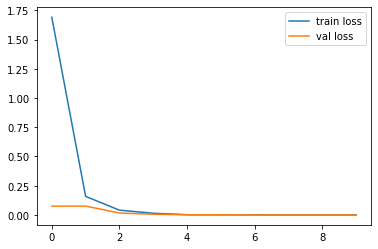

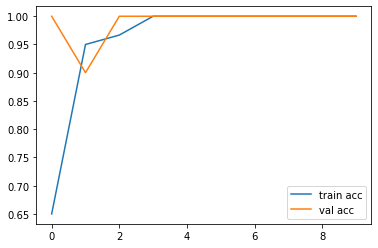

<Figure size 432x288 with 0 Axes>

In [21]:

# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [12]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model.save('model_glaucoma1.h5')

In [22]:
y_pred = model.predict(test_set)
y_pred

array([[9.9999833e-01, 1.6834277e-06],
       [2.2601689e-06, 9.9999774e-01],
       [9.9999106e-01, 8.9197847e-06],
       [7.8768731e-04, 9.9921227e-01],
       [1.4519774e-04, 9.9985480e-01],
       [9.9999869e-01, 1.2630211e-06],
       [1.0717349e-07, 9.9999988e-01],
       [9.9999928e-01, 7.6262677e-07],
       [1.0413937e-07, 9.9999988e-01],
       [1.0000000e+00, 4.5710578e-08],
       [9.9999928e-01, 7.6262677e-07],
       [9.9999893e-01, 1.0716844e-06],
       [9.9998212e-01, 1.7916571e-05],
       [9.9995005e-01, 4.9922099e-05],
       [9.9991262e-01, 8.7389424e-05],
       [6.1368002e-05, 9.9993861e-01],
       [5.6176368e-06, 9.9999440e-01],
       [1.5362895e-05, 9.9998462e-01],
       [6.1538776e-05, 9.9993849e-01],
       [2.5702034e-06, 9.9999738e-01]], dtype=float32)

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
      dtype=int64)